- Groupby to take top 10 players of each team based on average minutes played in a season
- Plotted histogram of GP per year from 1996-2016 excluding lockout years(shortened)
- Significant years: 
    -2014-15 of 7 all-star players out for the season
        link: http://www.detroitbadboys.com/2015/3/6/8160489/wesley-matthews-injury-achilles-nba-injuries-2014-2015
    -2005-06- The 2005-06 campaign is utilized as the initial season of interest as the league adopted a new way to handle injured players during the season. Prior to the change in 2005-06, teams were required to place two individuals on an injured reserve list. Players were required to stay on the injured list for a minimum of five games and it quickly became a place to stash players, injured or not. As a result, an alarming number of rookies or role players would suddenly came down with “patellar tendinitis” or “back spasms,” skewing the data in the process
        link: http://instreetclothes.com/nba-injury-analysis/

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats

plt.style.use('fivethirtyeight')
%matplotlib inline
%config InlineBackend.figure_format = 'retina'


In [152]:
# start = [str(i) for i in range(1996, 2016)]
# end = [str(i) for i in range(97, 100)] + [str(i)[-2:] for i in range(100, 117)]
# zipped = [x +'-' + y for x, y in zip(start, end)]
# print zipped

# Need to exclude years 1998-99 and 2011-12. NBA teams schedule shortened due to nba lockout.

years = ['1996-97', '1997-98', '1998-99', '1999-00', '2000-01', '2001-02', '2002-03', 
         '2003-04', '2004-05', '2005-06', '2006-07', '2007-08', '2008-09', 
         '2009-10', '2010-11', '2011-12', '2012-13', '2013-14', '2014-15', '2015-16']

In [153]:
# Load all Regular Season Player stats from 1996-2016
# Dictionary of data frames df_1996-97 to df_2015-16
df_year = {}
for y in years:
    df = pd.read_csv('/Users/amos/Desktop/DSI-SF-2-amoskim25/copy_capstone/datasets/player_avgs/player_average_%s.csv' % y)
    df_year[y] = df

In [154]:
# One row in 90's that contain Nan value
for y in years:
    print y
    print df_year[y].isnull().sum()
    print "============================"

1996-97
Unnamed: 0           0
Unnamed: 0.1         0
PLAYER_ID            0
PLAYER_NAME          1
TEAM_ID              1
TEAM_ABBREVIATION    1
AGE                  1
GP                   0
W                    0
L                    0
W_PCT                0
MIN                  0
FGM                  0
FGA                  0
FG_PCT               0
FG3M                 0
FG3A                 0
FG3_PCT              0
FTM                  0
FTA                  0
FT_PCT               0
OREB                 0
DREB                 0
REB                  0
AST                  0
TOV                  0
STL                  0
BLK                  0
BLKA                 0
PF                   0
PFD                  0
PTS                  0
PLUS_MINUS           0
DD2                  0
TD3                  0
CFID                 0
CFPARAMS             0
SEASON               0
dtype: int64
1997-98
Unnamed: 0           0
Unnamed: 0.1         0
PLAYER_ID            0
PLAYER_NAME          0
TEAM_

In [155]:
for y in years:
    # drop Nan row in 96-97 adn 99-00
    df_year[y].dropna(axis=0,inplace=True)
    # drop columns that start with 'Unn'
    df_year[y].drop([col for col in df_year[y].columns if col.startswith('Unn')], axis=1, inplace=True)
    

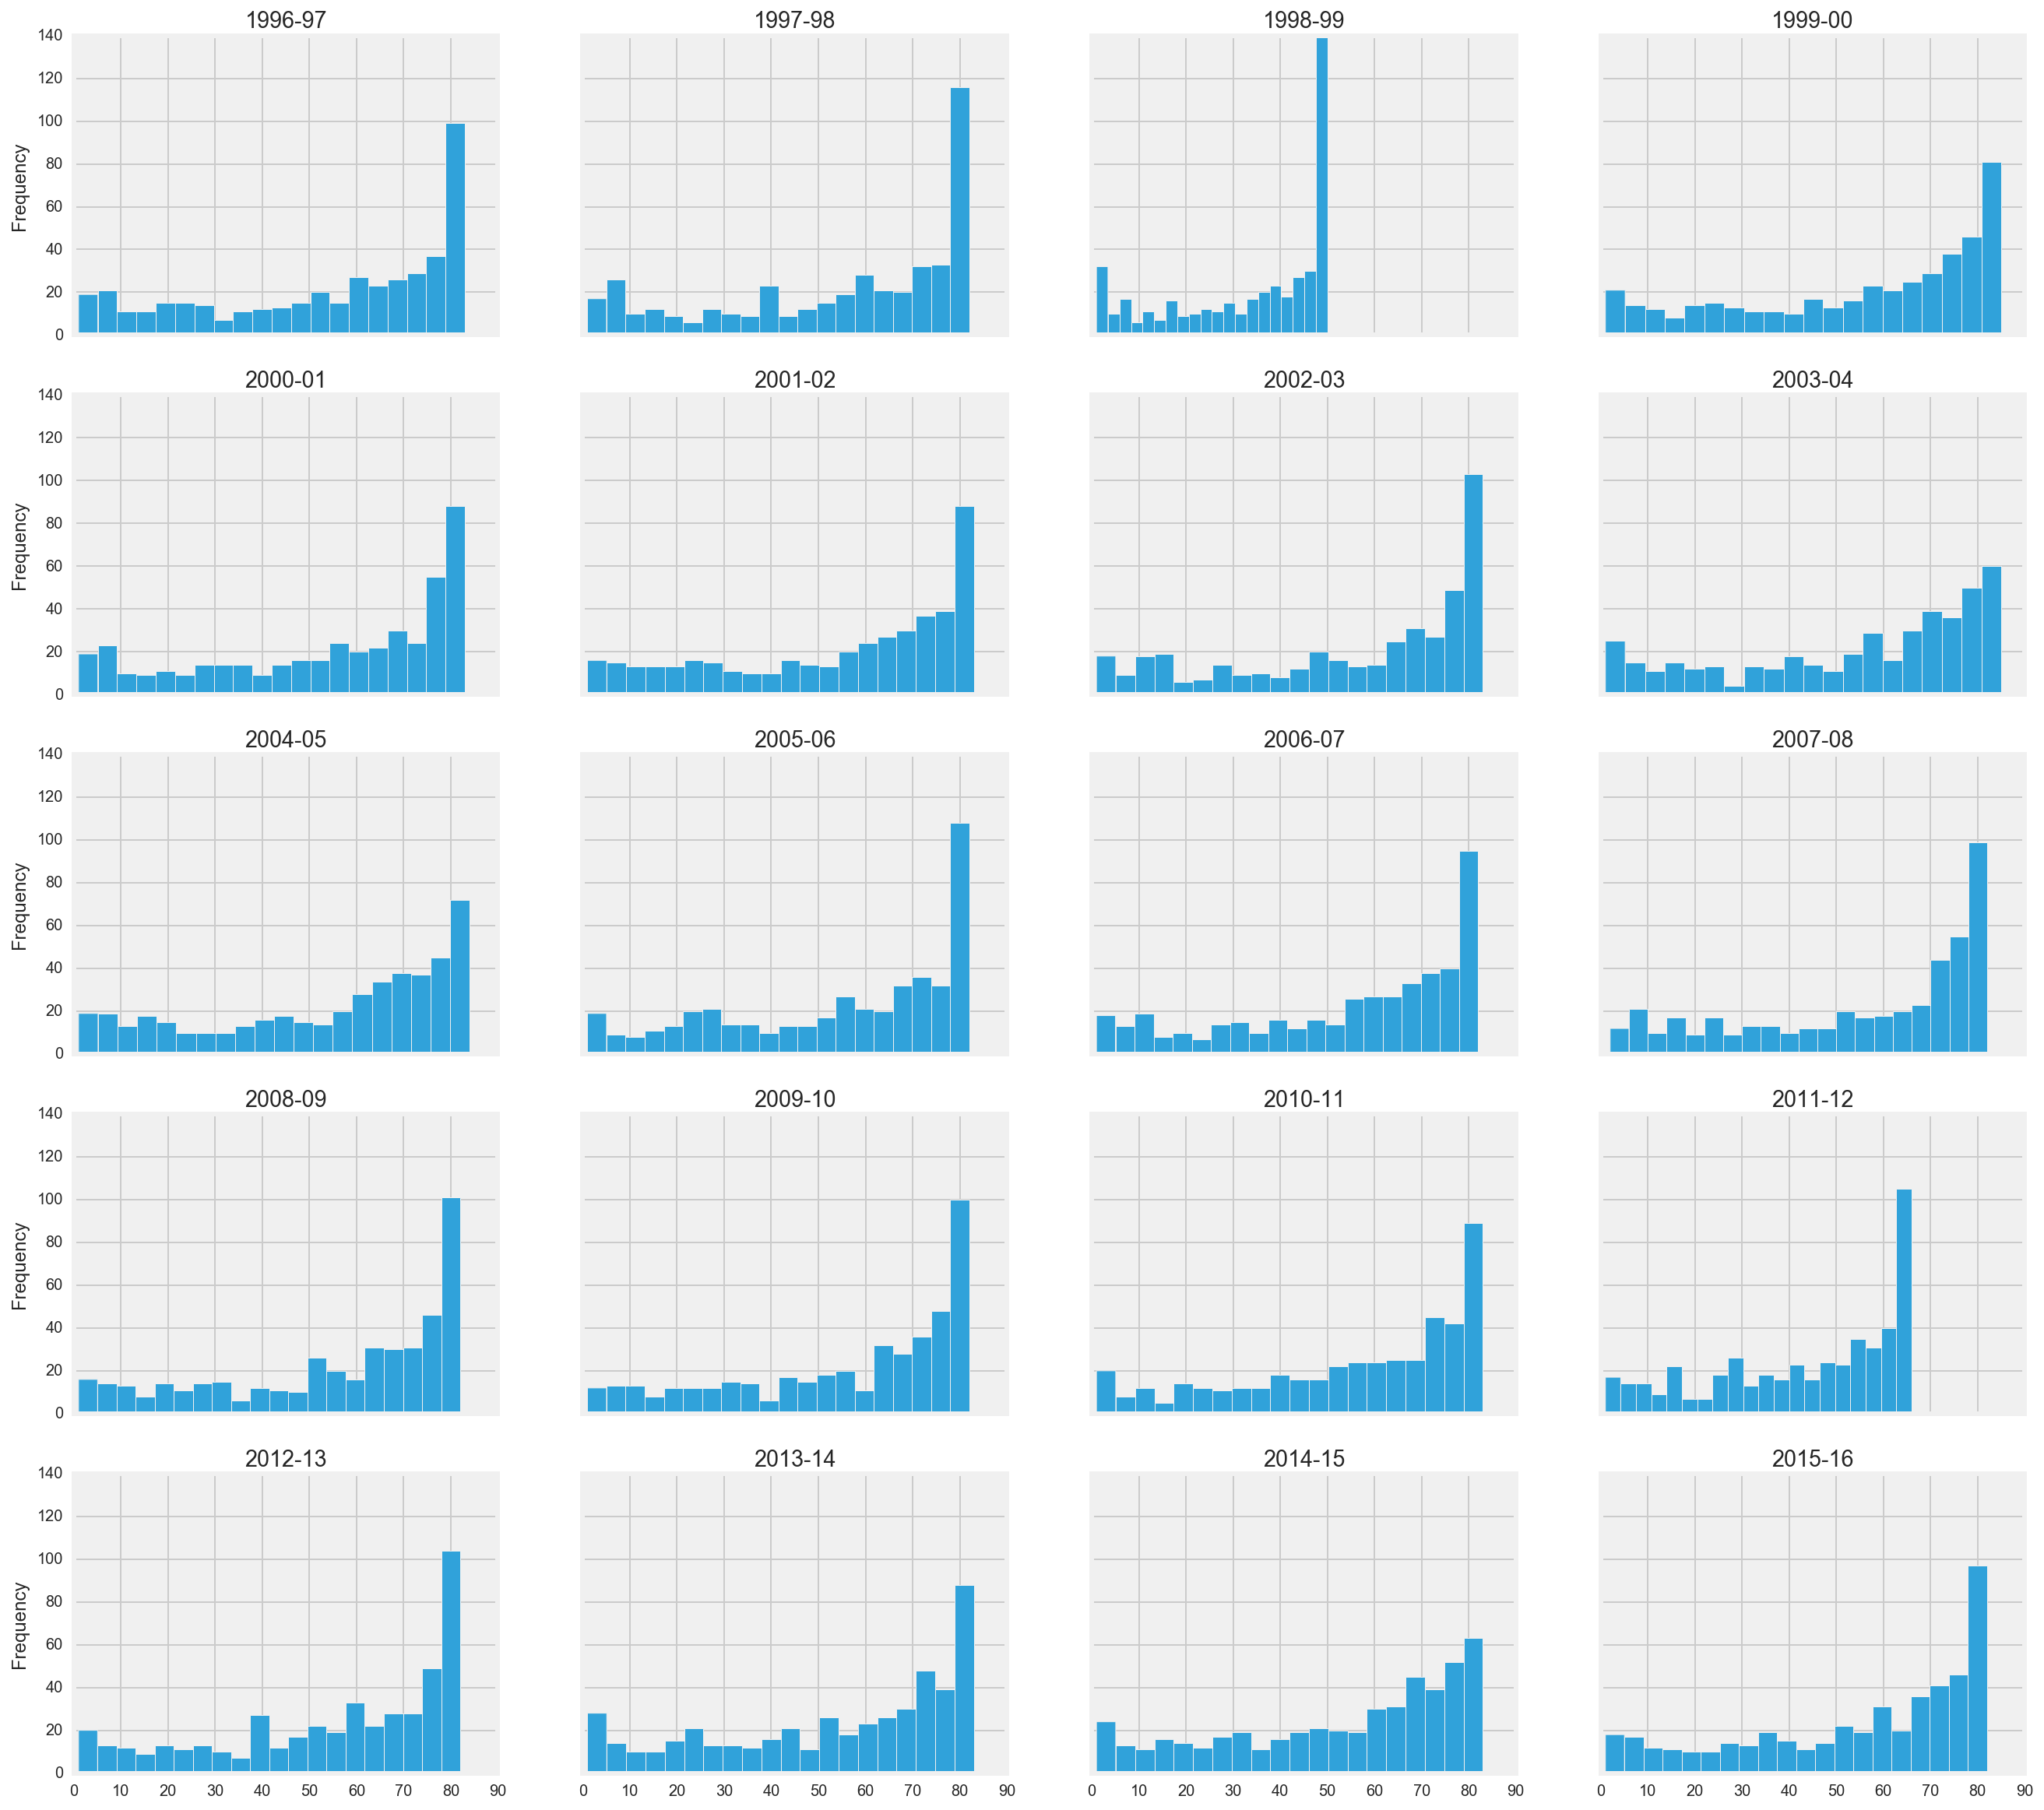

In [156]:
# Histogram of Games Played for nba players per season 

fig,ax = plt.subplots(5,4,figsize=(20,20), sharex=True, sharey=True)

for i, y in enumerate(years[:4]):
    ax[0,i] = df_year[y]['GP'].plot(kind='hist', ax=ax[0,i], bins=20)
    ax[0,i].set_title(y)
for i, y in enumerate(years[4:8]):
    ax[1,i] = df_year[y]['GP'].plot(kind='hist', ax=ax[1,i], bins=20)
    ax[1,i].set_title(y)
for i, y in enumerate(years[8:12]):
    ax[2,i] = df_year[y]['GP'].plot(kind='hist', ax=ax[2,i], bins=20)
    ax[2,i].set_title(y)
for i, y in enumerate(years[12:16]):
    ax[3,i] = df_year[y]['GP'].plot(kind='hist', ax=ax[3,i], bins=20)
    ax[3,i].set_title(y)
for i, y in enumerate(years[16:20]):
    ax[4,i] = df_year[y]['GP'].plot(kind='hist', ax=ax[4,i], bins=20)
    ax[4,i].set_title(y)
plt.show()

# Groupby each team. Create analysis on Games Played on top 8 players based on average minutes per game


In [119]:
df = df_year['1996-97']
df.columns.tolist()

['PLAYER_ID',
 'PLAYER_NAME',
 'TEAM_ID',
 'TEAM_ABBREVIATION',
 'AGE',
 'GP',
 'W',
 'L',
 'W_PCT',
 'MIN',
 'FGM',
 'FGA',
 'FG_PCT',
 'FG3M',
 'FG3A',
 'FG3_PCT',
 'FTM',
 'FTA',
 'FT_PCT',
 'OREB',
 'DREB',
 'REB',
 'AST',
 'TOV',
 'STL',
 'BLK',
 'BLKA',
 'PF',
 'PFD',
 'PTS',
 'PLUS_MINUS',
 'DD2',
 'TD3',
 'CFID',
 'CFPARAMS',
 'SEASON']

In [157]:
columns = ['PLAYER_NAME', 'AGE',
 'GP',
 'W',
 'L',
 'W_PCT',
 'MIN',
 'FGM',
 'FGA',
 'FG_PCT',
 'FG3M',
 'FG3A',
 'FG3_PCT',
 'FTM',
 'FTA',
 'FT_PCT',
 'OREB',
 'DREB',
 'REB',
 'AST',
 'TOV',
 'STL',
 'BLK',
 'BLKA',
 'PF',
 'PFD',
 'PTS',
 'PLUS_MINUS']

In [158]:
# Group by each team
# Within each group/team players are sorted based on minutes played in descending order
# Limit top 10 players based on minutes played

def top_players(df, num_of_players=10, column='MIN'):
    return df.sort_values(by=column, ascending=False)[:num_of_players]

# Applying function to each dataframe in df_year
df_top_players = {}
for y in years:
    group = df_year[y].groupby('TEAM_ABBREVIATION').apply(top_players)
    df_top_players[y] = group[columns].reset_index()
    

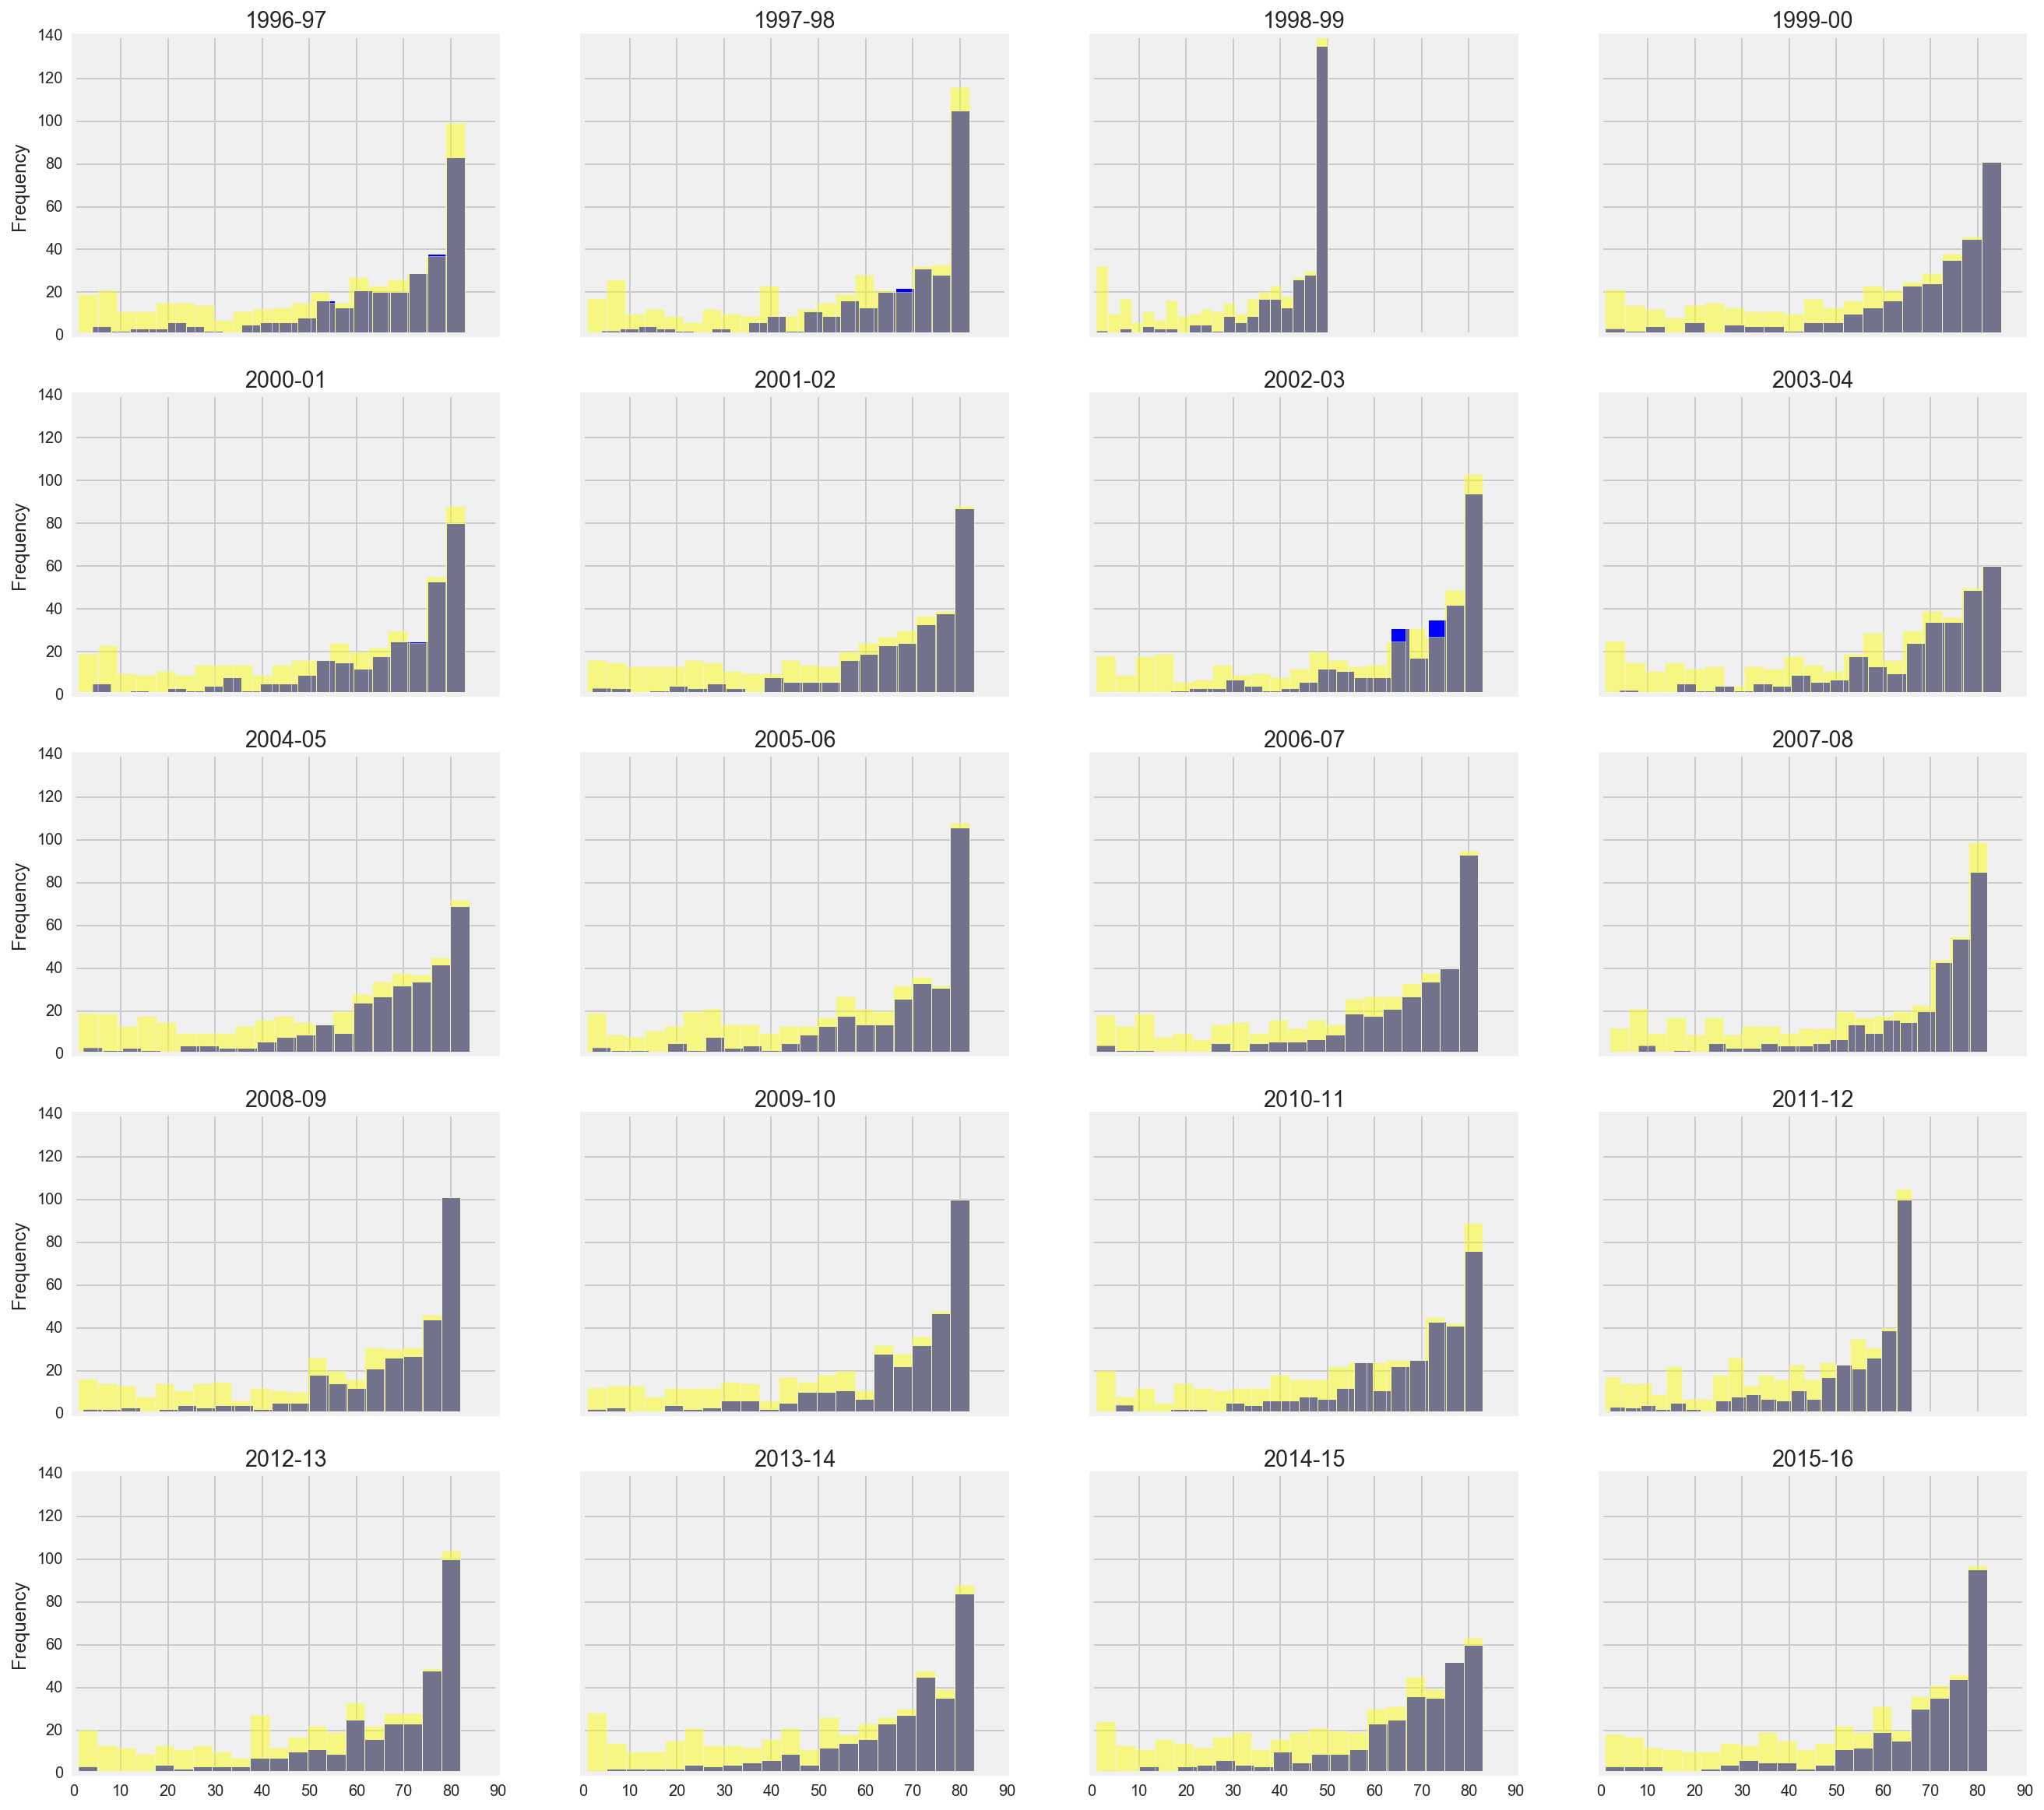

In [181]:
# Histogram of Games Played for nba players per season 
# 98-99 and 2011-12 reveals shortened lockout years. 

fig,ax = plt.subplots(5,4,figsize=(20,20), sharex=True, sharey=True)

for i, y in enumerate(years[:4]):
    ax[0,i] = df_top_players[y]['GP'].plot(kind='hist', ax=ax[0,i], color='blue',bins=20)
    ax[0,i].set_title(y)
    ax[0,i] = df_year[y]['GP'].plot(kind='hist', ax=ax[0,i], color='yellow', alpha=0.45, bins=20)
for i, y in enumerate(years[4:8]):
    ax[1,i] = df_top_players[y]['GP'].plot(kind='hist', ax=ax[1,i], color='blue',bins=20)
    ax[1,i].set_title(y)
    ax[1,i] = df_year[y]['GP'].plot(kind='hist', ax=ax[1,i], color='yellow', alpha=0.45, bins=20)
for i, y in enumerate(years[8:12]):
    ax[2,i] = df_top_players[y]['GP'].plot(kind='hist', ax=ax[2,i],color='blue', bins=20)
    ax[2,i].set_title(y)
    ax[2,i] = df_year[y]['GP'].plot(kind='hist', ax=ax[2,i], color='yellow', alpha=0.45, bins=20)
for i, y in enumerate(years[12:16]):
    ax[3,i] = df_top_players[y]['GP'].plot(kind='hist', ax=ax[3,i], color='blue',bins=20)
    ax[3,i].set_title(y)
    ax[3,i] = df_year[y]['GP'].plot(kind='hist', ax=ax[3,i], color='yellow', alpha=0.45, bins=20)
for i, y in enumerate(years[16:20]):
    ax[4,i] = df_top_players[y]['GP'].plot(kind='hist', ax=ax[4,i], color='blue',bins=20)
    ax[4,i].set_title(y)
    ax[4,i] = df_year[y]['GP'].plot(kind='hist', ax=ax[4,i], color='yellow', alpha=0.45, bins=20)
plt.show()

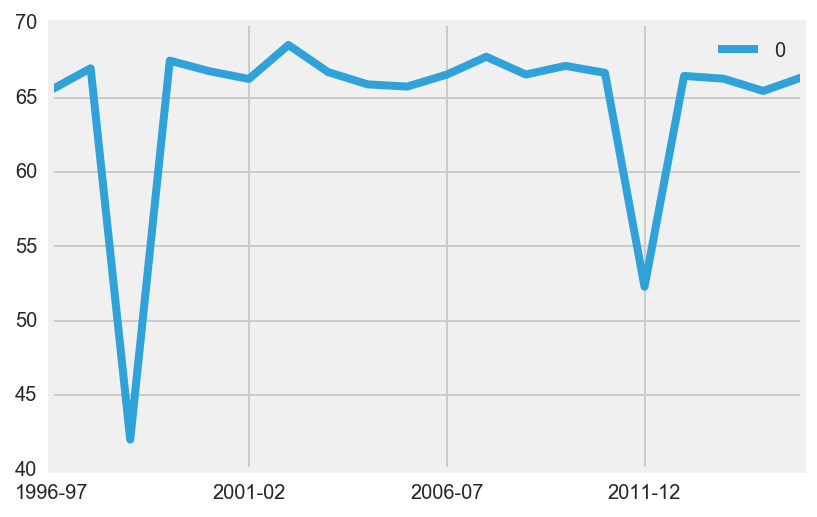

In [160]:
# group.groupby(['TEAM_ABBREVIATION'])[['GP']].mean().
gp_mean = {}
for y in years:
    gp_mean[y] = [df_top_players[y].GP.mean()]
    
pd.DataFrame.from_dict(gp_mean).T.plot(kind='line')

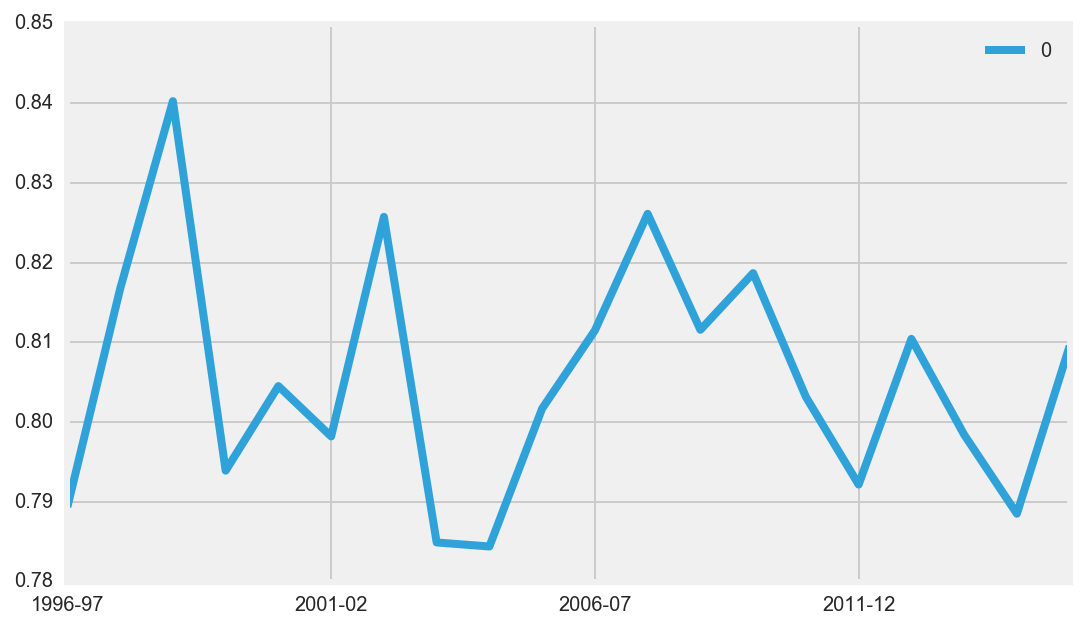

In [193]:
gp_pct = {}
for y in years:
    gp_pct[y] = [df_top_players[y].GP.mean() / df_top_players[y].GP.max()]
    
fig, ax = plt.subplots(figsize=(8,5))

pd.DataFrame.from_dict(gp_pct).T.plot(kind='line', ax=ax)

plt.show()

In [201]:
# Games played per year for all non-lockout years
gp_nonlockout = {}
for key, value in gp_pct.items():
    if key not in ['1998-99', '2011-12']:
        gp_nonlockout[key] = value

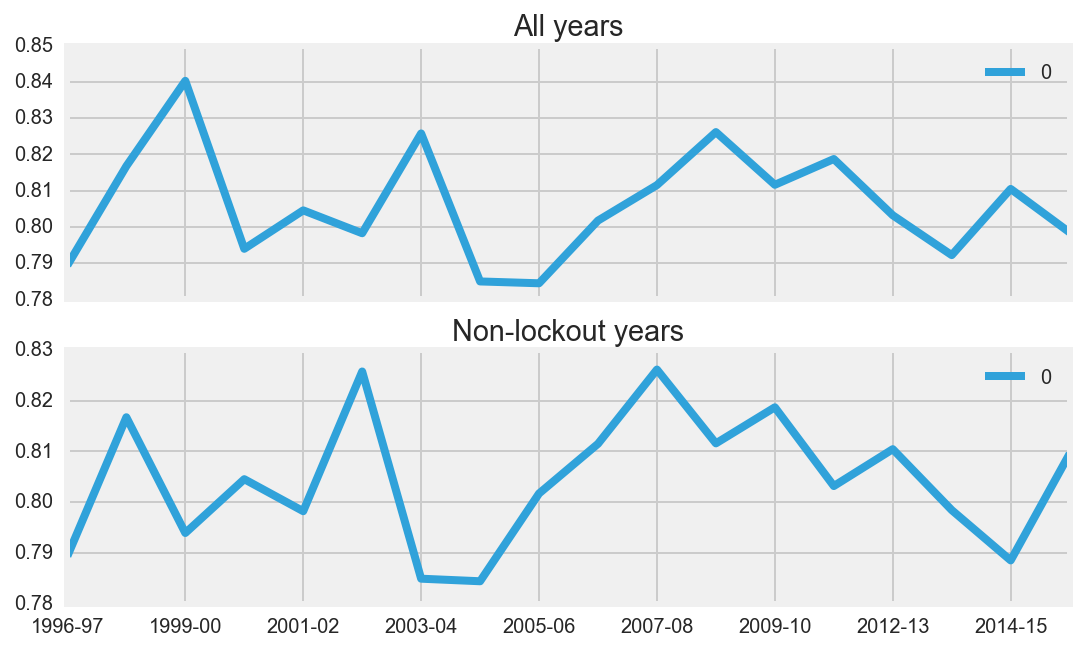

In [202]:
fig, axarr = plt.subplots(2,1, figsize=(8,5), sharex=True)

axarr[0] = pd.DataFrame.from_dict(gp_pct).T.plot(kind='line', ax=axarr[0])
axarr[0].set_title('All years')
axarr[1] = pd.DataFrame.from_dict(gp_nonlockout).T.plot(kind='line', ax=axarr[1])
axarr[1].set_title('Non-lockout years')
plt.show()

# Droppable columns
- 'Unnamed: 0'
- 'DD2' Count of double-doubles
- 'TD3' Count of triple doubles
- 'CFID', irrelevant
- 'CFPARAMS', ???


In [44]:
for col in df_1996.columns[-4:]:
    print "Unique values for column %s:" % col
    print df_1996[col].unique()
    print "============================================"

Unique values for column DD2:
[ 0 16  1  2 19 32  3 44 33 20 12 15 11  9  5  4 23 37 29  8 41 31 22 10  6
 27 14  7 28 43 17 36 13 21 24 30 34 18 47 25 45]
Unique values for column TD3:
[ 0  4  2  1  3 13]
Unique values for column CFID:
[5]
Unique values for column CFPARAMS:
['471,' '920,1610612742' '243,1610612765' '1425,1610612763'
 '768,1610612749' '228,1610612762' '154,1610612755' '673,1610612737'
 '1059,1610612757' '275,1610612752' '947,1610612755' '297,1610612748'
 '175,1610612738' '1043,1610612753' '692,1610612744' '457,1610612749'
 '358,1610612753' '924,1610612743' '193,1610612766' '292,1610612737'
 '324,1610612763' '156,1610612762' '952,1610612738' '213,1610612754'
 '176,1610612760' '226,1610612739' '686,1610612743' '288,1610612749'
 '717,1610612757' '732,1610612764' '422,1610612759' '769,1610612744'
 '989,1610612756' '1112,1610612764' '104,1610612761' '82,1610612741'
 '182,1610612758' '902,1610612744' '183,1610612741' '898,1610612763'
 '448,1610612746' '682,1610612739' '310,1

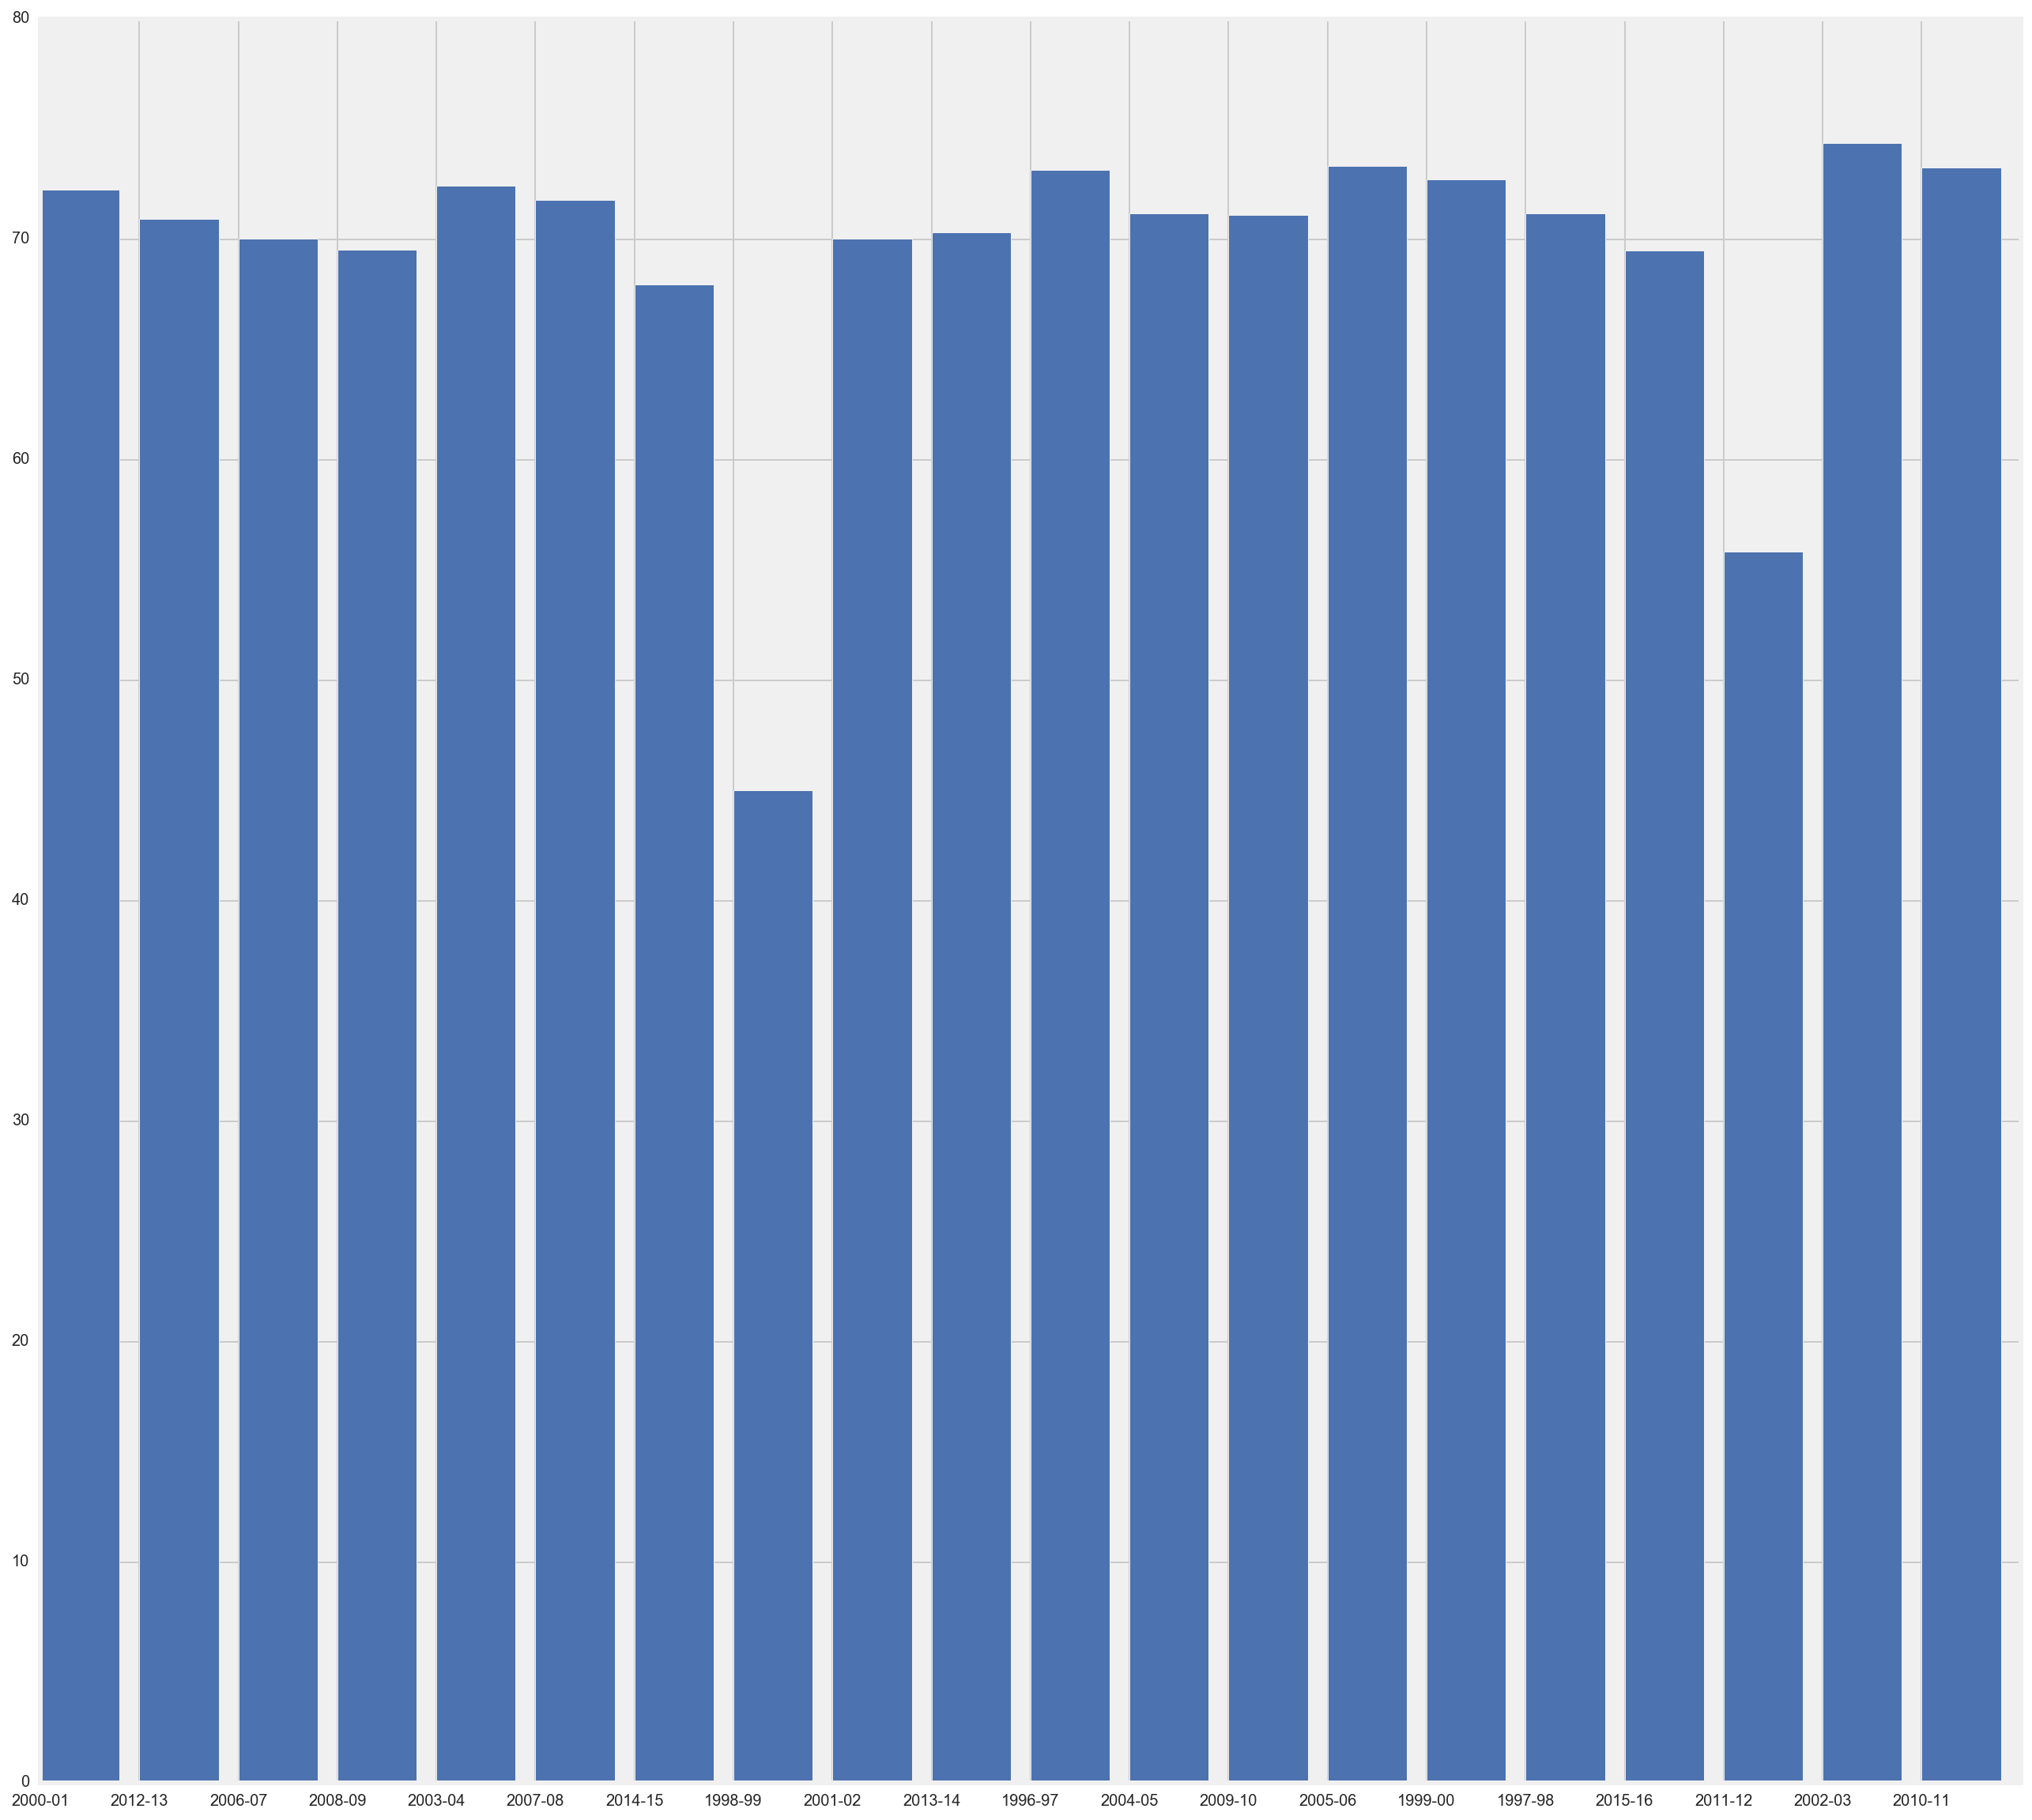

In [140]:
# df = pd.DataFrame(years_gp_dict, index=[0])
# df.plot(x=df.iloc[0,:],kind='hist')

# plt.bar(years_gp_dict.keys(), years_gp_dict.values(), align='center')
# plt.show()
# keys = []
# values = []
# for k,v in years_gp_dict.items():
#     keys.append(k)
#     values.append(v)
# fig, ax = plt.subplots(figsize=(20,20))
# plt.bar(range(len(years_gp_dict)), values)
# plt.xticks(range(len(years_gp_dict)), keys)

# plt.show()

In [199]:
lockout_years = ['1998-99', '2011-12']
for y in lockout_years:
    del years_gp_dict[y]

years_gp_dict
# need to delete lockout years
# 1998-99, 2011-12

NameError: name 'years_gp_dict' is not defined

In [183]:

tmp = pd.DataFrame(years_gp_dict, index=[0]).T


In [184]:
tmp.index = tmp.index.map(lambda x: x[:4])

In [185]:
tmp.index = pd.to_datetime(tmp.index)

In [198]:
tmp.iloc[:,1]

NameError: name 'tmp' is not defined

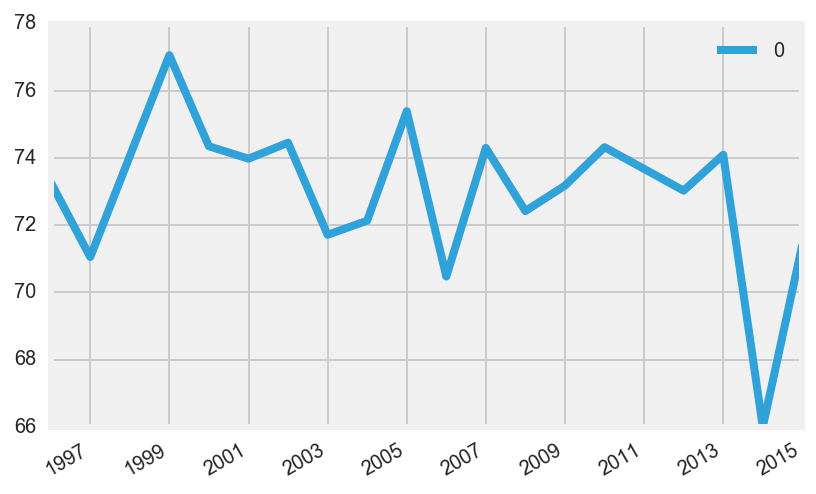

In [186]:
tmp.plot()